# 使用PCA

首先，我们先随机生成一个三维的随机样例的数据

In [1]:
import numpy as np

np.random.seed(3478238423) # random seed for consistency
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

生成的样例

In [2]:
print(class1_sample)

[[-0.88133194 -0.45287853  0.91513092  0.15192389 -1.16565972 -1.07867474
  -0.57794574  0.10217811 -0.93946091  0.12452743 -1.55158455 -1.32145842
   0.33499151  1.90417594  0.25254644  1.7579604  -0.64391234 -0.40086746
  -1.22047117  1.17356187]
 [-2.32958056  0.21587404  0.09015768  1.11445788 -0.50614004  1.36355641
  -0.48056074 -0.21802078  0.29180916  0.07867499  0.49571521  0.53464383
   1.31134426 -1.3312696   1.17813753 -0.93082234 -1.88769448  0.18117707
   0.82772234  1.0310197 ]
 [-1.59376228 -1.89874827 -0.00255328  1.53932156  0.57958469 -0.27816053
  -0.0162546  -0.78569907  0.8072362   1.26509773  0.67391586  0.48004934
   1.31825101 -0.82768745  0.40819029 -0.18807316 -0.71445754  1.36575232
   0.43005271  0.21569384]]


将两个三维空间的样本画图呈现出来，可以看到是随机分布的

Populating the interactive namespace from numpy and matplotlib


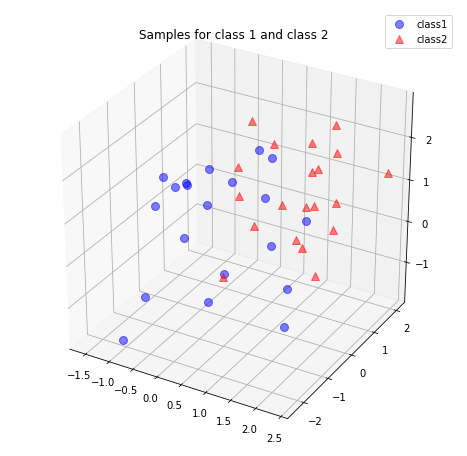

In [3]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

计算每一个维度的均值向量

In [5]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.49706276]
 [ 0.37858157]
 [ 0.57470876]]


计算散点矩阵

In [6]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 45.24763538   7.18749223  12.23808866]
 [  7.18749223  46.85934268  11.50255056]
 [ 12.23808866  11.50255056  48.02149948]]


计算协方差矩阵(唯一的不同是都除了【N-1=39】此处)

In [7]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.16019578  0.18429467  0.31379715]
 [ 0.18429467  1.20152161  0.29493719]
 [ 0.31379715  0.29493719  1.2313205 ]]


计算特征向量和相应的特征值，我们可以清晰的看到散点矩阵和协方差矩阵是正好39倍的关系

In [8]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.53039134]
 [-0.54386179]
 [-0.65030714]]
Eigenvalue 1 from scatter matrix: 67.62265903939752
Eigenvalue 1 from covariance matrix: 1.7339143343435235
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.62453611]
 [ 0.76939918]
 [-0.13408782]]
Eigenvalue 2 from scatter matrix: 39.02049832676564
Eigenvalue 2 from covariance matrix: 1.0005255981221954
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.57327102]
 [-0.33502127]
 [ 0.74774399]]
Eigenvalue 3 from scatter matrix: 33.48532017708459
Eigenvalue 3 from covariance matrix: 0.8585979532585796
Scaling factor:  39.0
----------------------------------------


接下来验证一下我们求得的特征值和特征向量是正确的

In [9]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='error here', verbose=True)

接下来将特征向量画图呈现出来以便我们更好的观察一下，图中的便是我们最终选择的特征向量，作为一组基。

Populating the interactive namespace from numpy and matplotlib


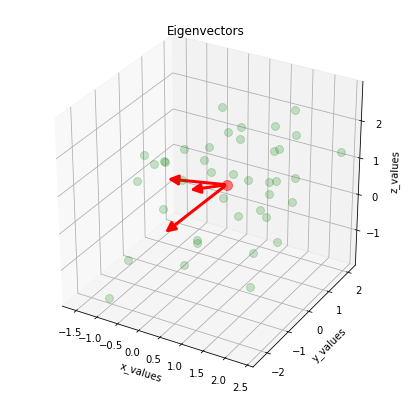

In [10]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

接下来我们通过降低特征值对特征向量进行排序
我们开始的目的是减少我们的特征空间的维度，即通过PCA将特征空间投影到更小的子空间上，其中特征向量将形成这个新特征子空间的轴。然而，特征向量仅定义新轴的方向，因为它们具有所有相同的单位长度1，我们接下来验证一下是否都为1.

In [11]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

因此，为了确定我们要为我们的低维子空间下降哪个特征向量，我们必须看一下特征向量的相应特
征值。粗略来说，具有最低特征值的特征向量具有关于数据分布的最少信息，并且那些是我们想
要降低的信息。
通常的方法是将特征向量从最高到最低对应的特征值进行排序，并选择最上面的K个特征向量。

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

67.6226590394
39.0204983268
33.4853201771


## 选择具有最大特征值的k个特征向量
我们将三维特征空间减少到二维特征子空间，我们将两个特征向量与最高特征值组合，
以构建我们的d×k维特征向量矩阵W

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.53039134 -0.62453611]
 [-0.54386179  0.76939918]
 [-0.65030714 -0.13408782]]


## 将样本转换到新的子空间
在最后一步，我们使用我们刚刚计算的2×3维矩阵W，通过等式y = W的转置 × X
可以看到现在已经是二维的了。

In [14]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
print(transformed)

[[ 2.77085567  1.35756676 -0.53275041 -1.68772198  0.51661799  0.01142329
   0.57846652  0.5753245  -0.18537338 -0.93153868  0.11509416  0.09793824
  -1.74813468  0.25231929 -1.04014149 -0.30386295  1.83278727 -0.77407714
  -0.08250556 -1.32344653 -1.41102549 -0.80403961 -1.10809732  0.41627981
  -3.16496099 -2.02989056 -1.11857205 -1.68621128 -2.57244538 -2.19592273
  -3.2389218  -2.78072069 -0.44633899 -0.83194053 -1.6166784  -2.08632796
  -2.01549834 -2.23452196 -1.30332397 -1.00052426]
 [-1.02824964  0.70353133 -0.5018227   0.55617675  0.26085762  1.76008845
  -0.00661551 -0.12620625  0.70300445 -0.18687361  1.26005955  1.17228425
   0.62297149 -2.10252158  0.69400033 -1.78886538 -0.95444402  0.20662294
   1.34141238  0.03141203  1.06200491  0.51910463  0.88480801 -1.44505504
  -0.06235034 -0.32759073 -1.70065489 -0.14618409  0.03652057  0.63086177
  -1.21399278 -0.34159749  1.27247107 -2.084492   -0.56435093 -0.07287521
   0.22570908 -1.04065953 -0.57103535 -1.52605429]]


把他画图体现出来，可以看出我们已经把他降到了二维平面上。

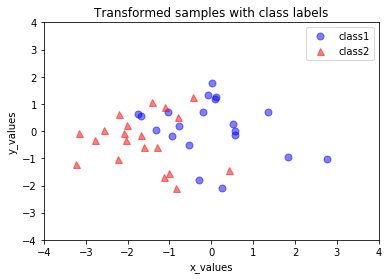

In [15]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

刚刚是算法的原理和过程，实际上，我们可以利用内置的python库来对其进行降维

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.56112588  0.54014962  0.62719705]
 [-0.65948954  0.74965506 -0.05559536]
 [-0.50021125 -0.38243389  0.77687388]]


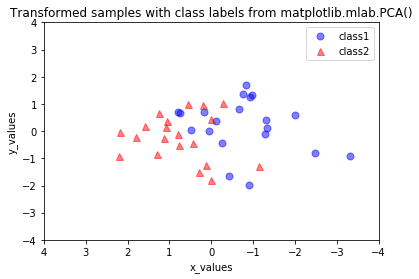

In [16]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(all_samples.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([4,-4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

当我们将转换的数据集绘制到新的二维子空间上时，我们观察到我们的逐步方法和matplotlib.mlab.PCA（）类的散点图看起来不一样。这是由于matplotlib.mlab.PCA（）类在计算协方差矩阵之前将变量缩放为单位方差。这将最终可能导致沿轴的不同变化，并影响变量对主要组件的贡献。

如果一个变量以单位英寸（其中另一个变量以cm为单位）进行了测量，则缩放比例就会变得有意义。然而，对于我们的假设例子，我们假设两个变量具有相同（任意）单位，所以我们跳过了缩放输入数据的步骤。

为了确保我们没有一步一步的错误，我们将使用另一个库，默认情况下不会重新缩放输入数据。
在这里，我们将使用scikit学习机器学习库中的PCA类。

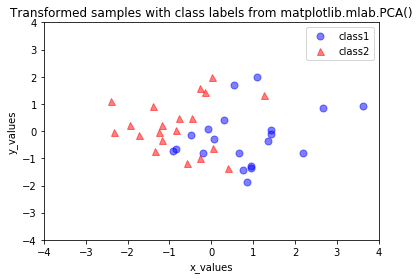

In [17]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

上面的情节似乎是从一步一步的方法的剧情的确切的镜像。这是因为特征向量的符号可以是正的
或负的，因为特征向量被缩放到单位长度1，所以我们可以简单地将经变换的数据
乘以×（-1）×（-1）到恢复镜像。

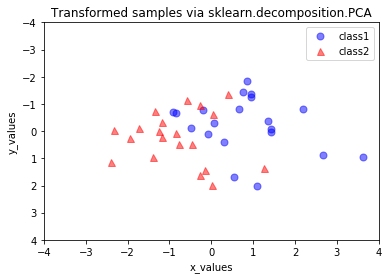

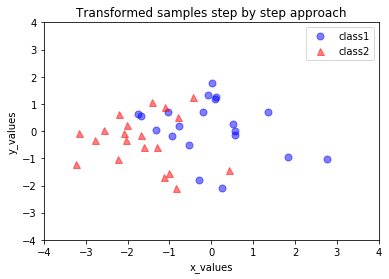

In [19]:
#sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([4,-4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()